# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for seaborn
sns.set(style="whitegrid")

# Load and Inspect Data
Load the dataset and perform initial inspection to understand its structure and contents.

/tmp/ipykernel_8435/3788283082.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/rossmann-store-sales/train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


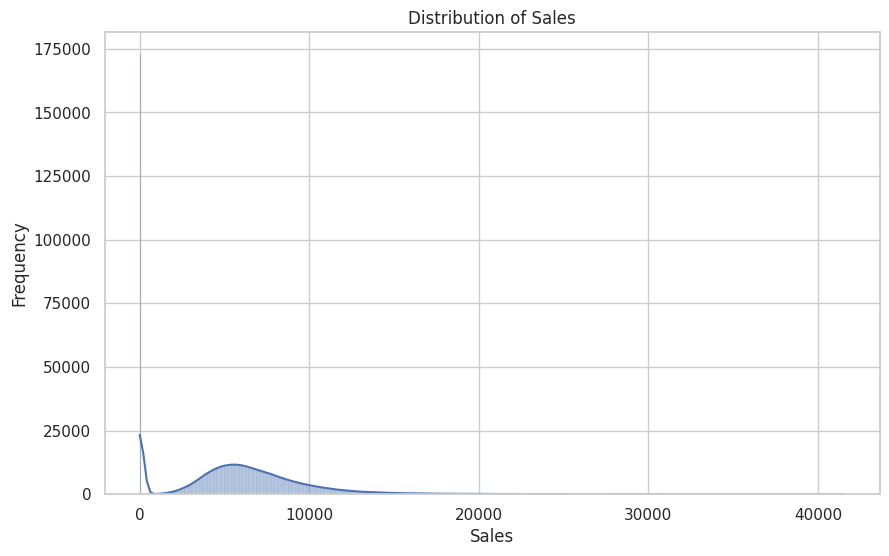

In [7]:
# Load and Inspect Data

# Load the dataset
data = pd.read_csv('../data/rossmann-store-sales/train.csv')

# Display the first few rows of the dataset
data.head()

# Display the summary statistics of the dataset
data.describe()

# Display information about the dataset
data.info()

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

# Display the distribution of the target variable (e.g., sales)
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [12]:

# Load Data
train = pd.read_csv('../data/rossmann-store-sales/train.csv')
test = pd.read_csv('../data/rossmann-store-sales/test.csv')
store = pd.read_csv('../data/rossmann-store-sales/store.csv')

# Inspect Data
print(train.head())
print(test.head())
print(store.head())

# Merge store information with train and test data
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

# Display merged data
print(train.head())
print(test.head())

/tmp/ipykernel_8435/1582764563.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/rossmann-store-sales/train.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2

# Data Cleaning
Handle missing data and detect and handle outliers to ensure data quality.

In [13]:
# Data Cleaning

# Handle missing data
# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
missing_values_after_cleaning = data.isnull().sum()
missing_values_after_cleaning

# Detect and handle outliers
# Using Z-score to identify outliers
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers from the dataset
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Verify the shape of the dataset after removing outliers
data_cleaned.shape

(999832, 9)

# Handle Missing Data
Identify and handle missing data using appropriate techniques such as imputation or removal.

In [14]:
# Handle Missing Data

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
missing_values_after_cleaning = data.isnull().sum()
missing_values_after_cleaning

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(train[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

In [18]:
# Remove outliers from the dataset
train_cleaned = train[(z_scores < threshold).all(axis=1)]

# Verify the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", train_cleaned.shape)

Shape of the dataset after removing outliers: (999832, 18)


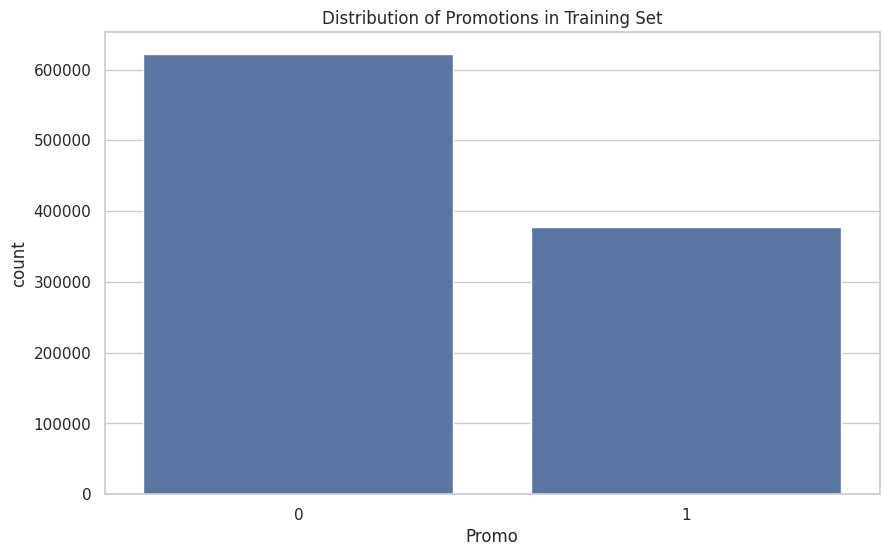

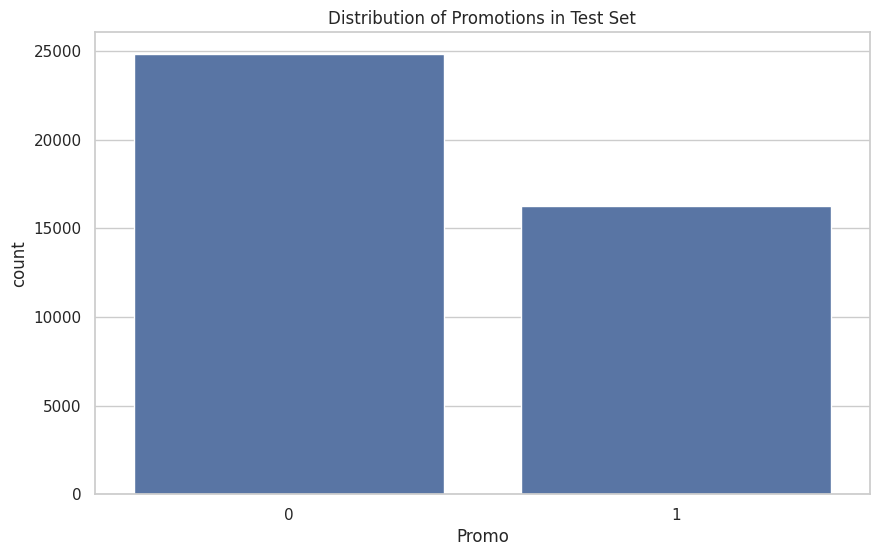

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Promotions in Training Set
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=train_cleaned)
plt.title('Distribution of Promotions in Training Set')
plt.show()

# Distribution of Promotions in Test Set
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=test)
plt.title('Distribution of Promotions in Test Set')
plt.show()

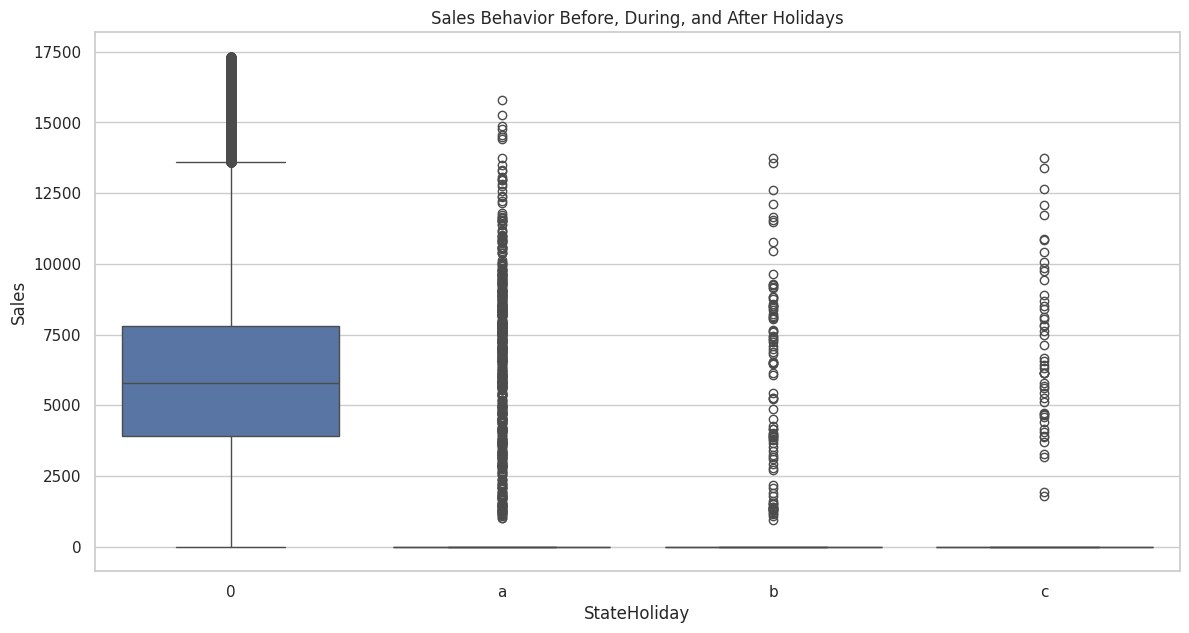

In [20]:
# Sales Behavior Before, During, and After Holidays
plt.figure(figsize=(14, 7))
sns.boxplot(x='StateHoliday', y='Sales', data=train_cleaned)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

/tmp/ipykernel_8435/1252483835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Date'] = pd.to_datetime(train_cleaned['Date'])
/tmp/ipykernel_8435/1252483835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Month'] = train_cleaned['Date'].dt.month


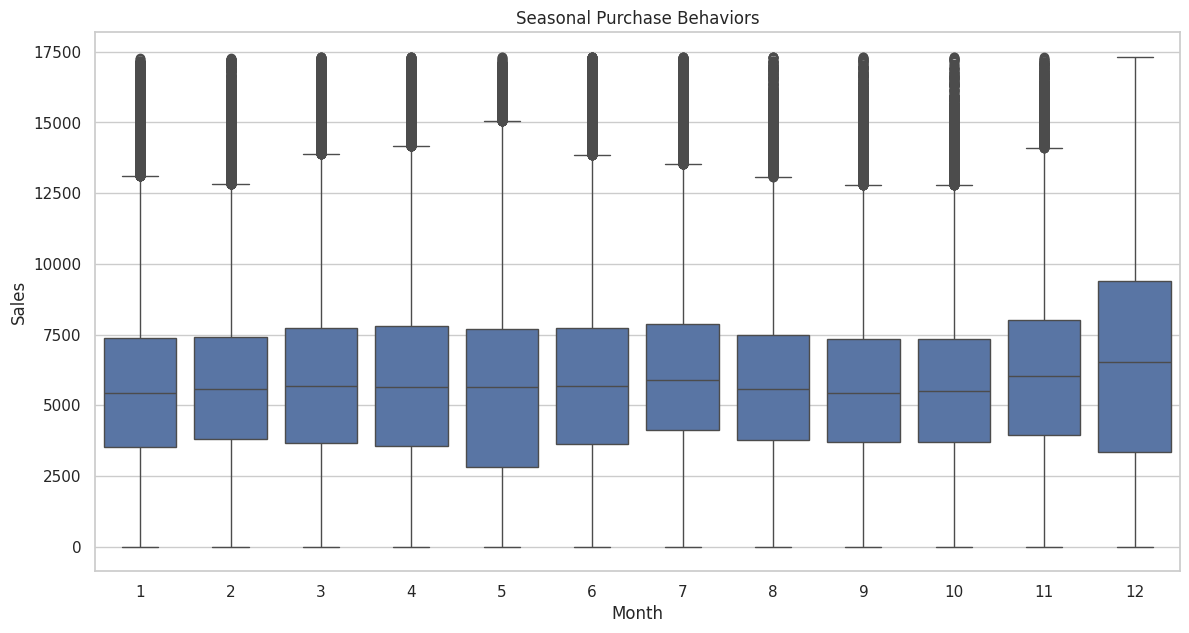

In [21]:
# Assuming 'Date' column is present and in datetime format
train_cleaned['Date'] = pd.to_datetime(train_cleaned['Date'])
train_cleaned['Month'] = train_cleaned['Date'].dt.month

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Sales', data=train_cleaned)
plt.title('Seasonal Purchase Behaviors')
plt.show()